Mount do Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Imports

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mtl
from sklearn import linear_model
from joblib import dump, load

League Params

In [3]:
league = 'Bundesliga2'
league_short = 'bd2'
season = '_2022_23'

Constantes

In [4]:
MAIN_PATH = '/content/drive/MyDrive/'
stats_path = MAIN_PATH + 'Data_Football/' + league + '/Stats/' + league + season + '_stats.csv'
model_path = MAIN_PATH + 'Data_Football/' + league + '/Model/' + league_short + '_model.joblib'

Functions

In [5]:
functions_path = MAIN_PATH + 'Colab Notebooks/Bet_Functions.ipynb'

%run '{functions_path}'

Init plot

In [6]:
mtl.rcParams['axes.grid'] = 'True'
mtl.rcParams['axes.spines.top'] = 'False'
mtl.rcParams['axes.spines.right'] = 'False'
mtl.rcParams['xtick.labelsize'] = 20
mtl.rcParams['ytick.labelsize'] = 20

Abrir stats

In [7]:
df_stats= pd.read_csv(stats_path)
df_stats

,Unnamed: 0,team,shots,shots_ot,shots_vs,shots_ot_vs,points,form
0,0,HEIDENHEIM,477,174,395,123,67,10
1,1,STPAULI,529,171,370,117,58,11
2,2,GREUTHERFURTH,432,155,396,148,41,5
3,3,KARLSRUHE,477,175,462,165,46,7
4,4,HAMBURG,498,188,448,165,66,10
5,5,BRAUNSCHWEIG,438,150,492,168,36,4
6,6,HOLSTEINKIEL,492,174,489,169,46,6
7,7,SANDHAUSEN,330,115,479,177,28,3
8,8,NURNBERG,445,140,449,143,39,6
9,9,REGENSBURG,395,129,447,165,31,3


Correlation Points vs Shots

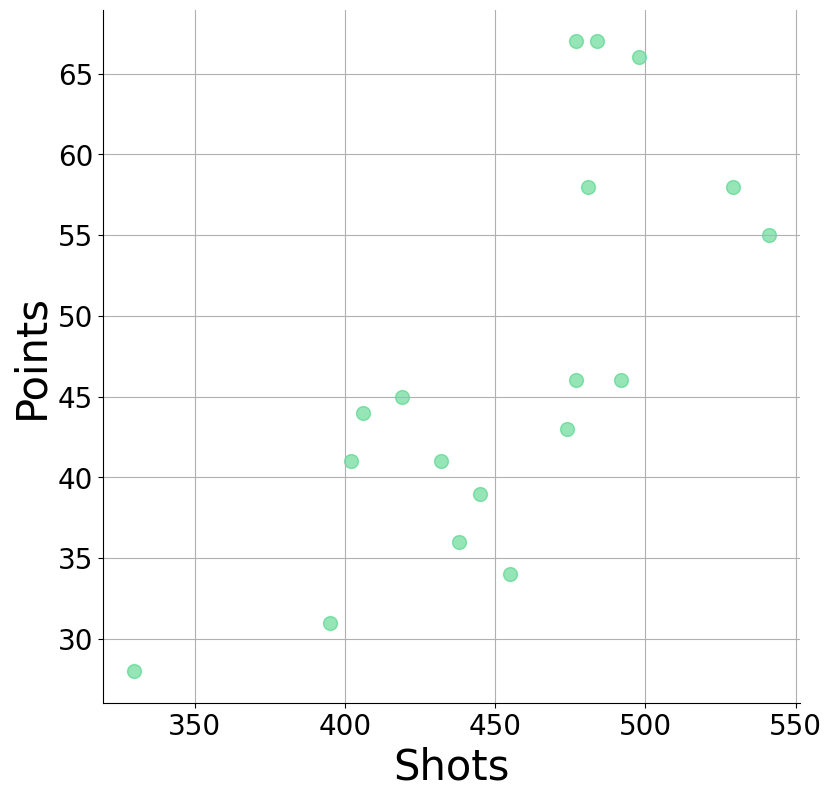

In [8]:
fig, ax = plt.subplots(figsize=(9,9))

plt.scatter(df_stats.shots, df_stats.points, s=100, alpha=0.5, c= "#2ECC71" )
ax.set_ylabel('Points', fontsize=30)
ax.set_xlabel('Shots', fontsize=30)

plt.show()

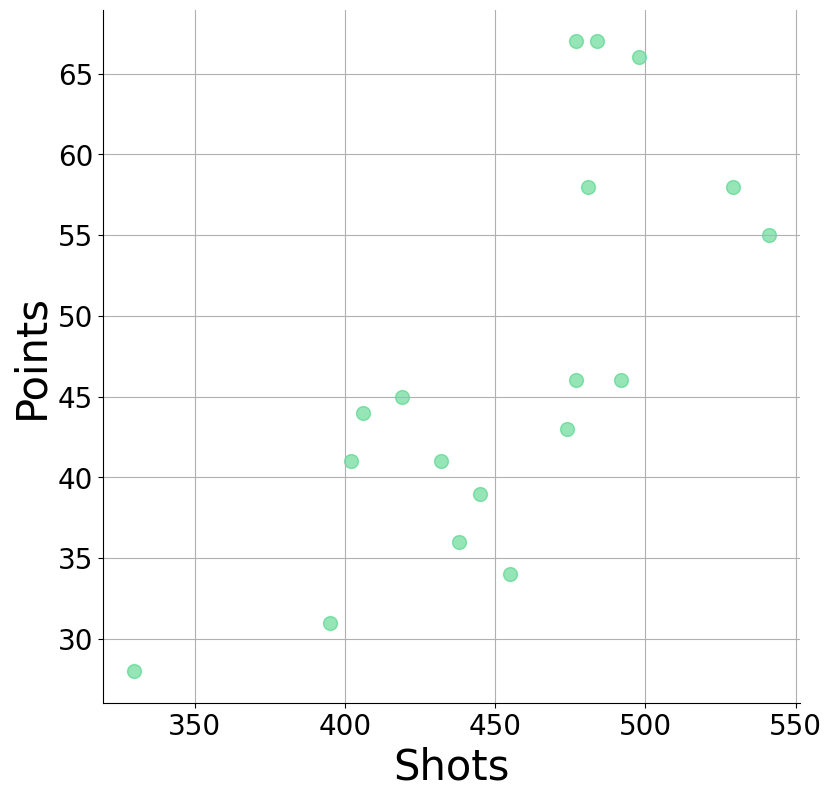

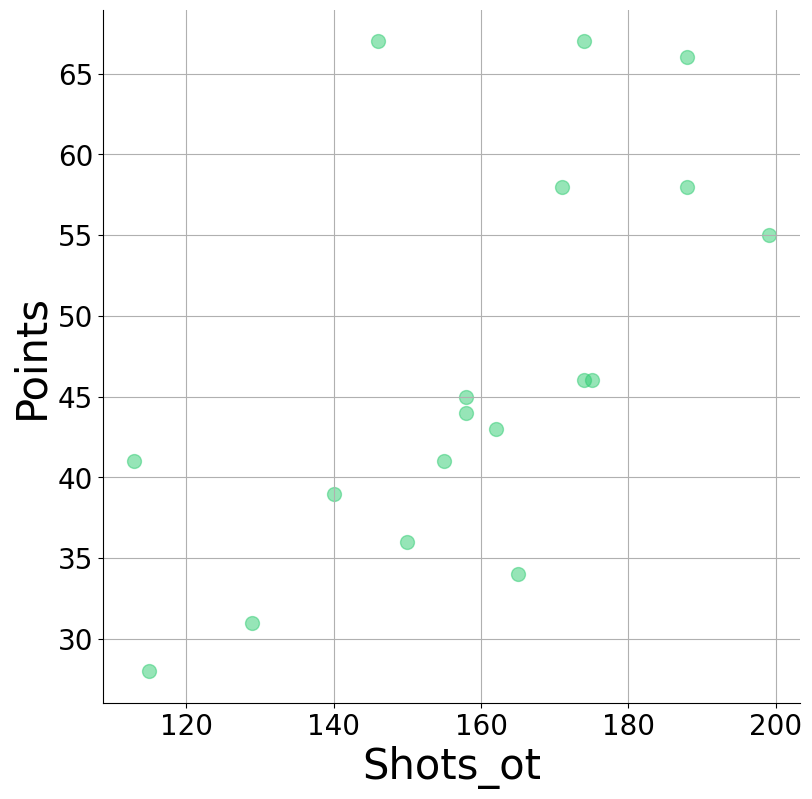

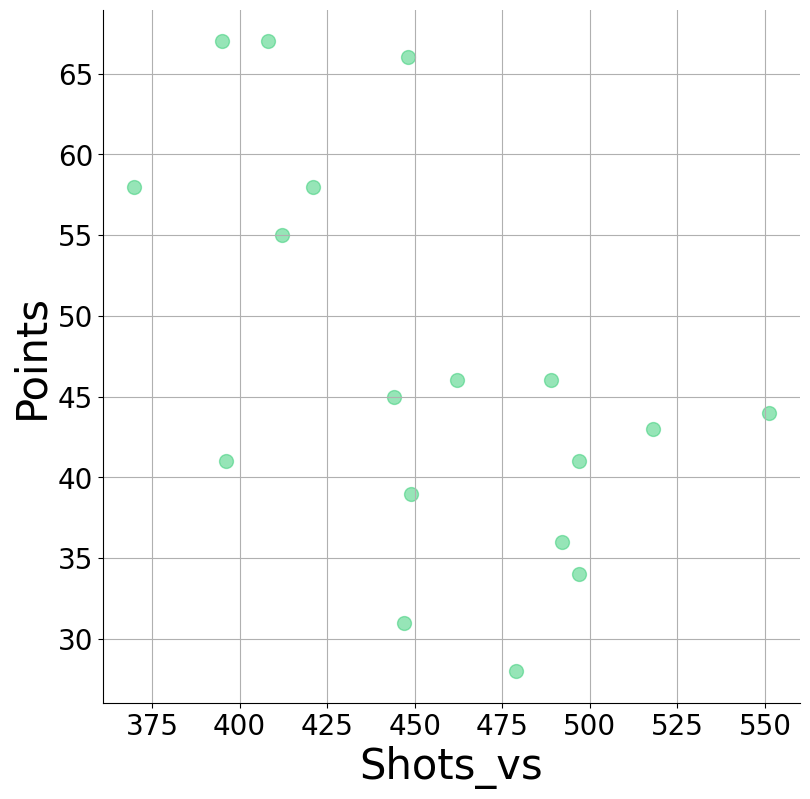

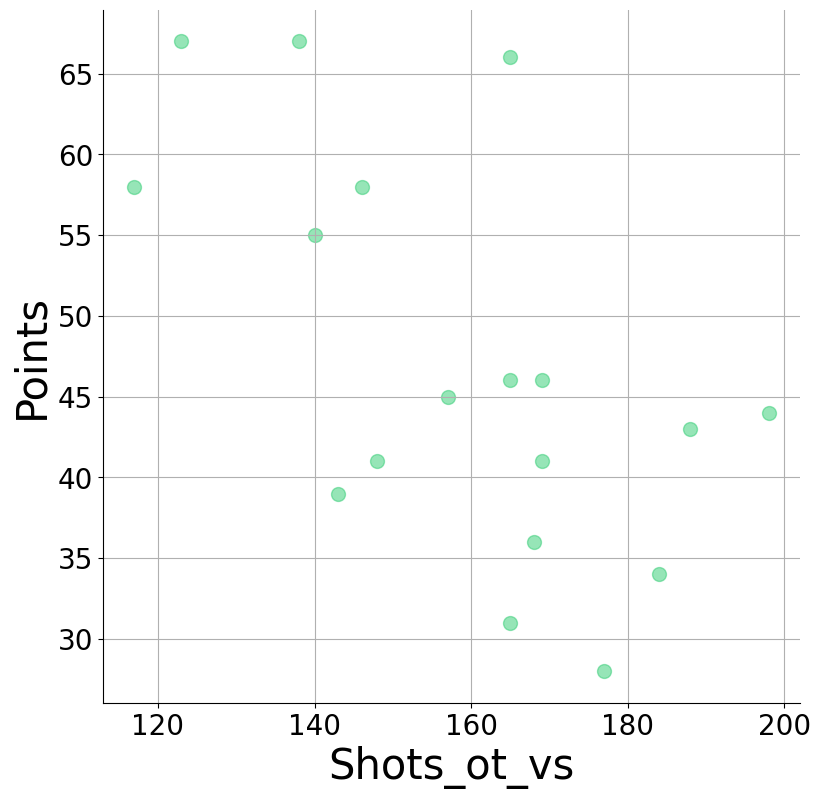

In [9]:
features = ['shots','shots_ot','shots_vs','shots_ot_vs']

for feat in features:
  fig, ax = plt.subplots(figsize=(9,9))

  plt.scatter(df_stats[feat], df_stats.points, s=100, alpha=0.5, c= "#2ECC71" )
  ax.set_ylabel('Points', fontsize=30)
  ax.set_xlabel(feat.capitalize(), fontsize=30)

  plt.show()

Model Training

In [10]:
features = df_stats[['shots','shots_ot','shots_vs','shots_ot_vs']]

target = df_stats['points']

regr = linear_model.LinearRegression(fit_intercept=False)

model = regr.fit(features, target)

model.score(features, target)

0.6074355390071726

Escreve o modelo no disco

In [11]:
dump (model, model_path)

['/content/drive/MyDrive/Data_Football/Bundesliga2/Model/bd2_model.joblib']